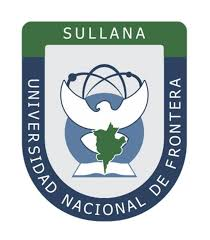
<center>
    <b>Metodos Númericos</b><br>
    <b>Sebastián Alonso Sosa Pérez</b>
<br><br>
<h1>Optmización de portafolios</h1>
</center>
<i>Creado:     06-09-2020 
    


# Llamanos a las siguientes librerias 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import mplcyberpunk
plt.style.use('cyberpunk')
np.random.seed(777)
import warnings
warnings.filterwarnings('ignore')

# Creamos un vector en donde contengan a las siguientes acciones 

In [22]:
acciones= ["IBM","BABA","AMZN","FB","MSFT","LNVGY","TSLA"]
data=pd.DataFrame()# Es en donde se almacena la información

In [23]:
for i in acciones:
  data[i]=web.get_data_yahoo(i,"2017-1-1")["Adj Close"]

# Graficamos las acciones 

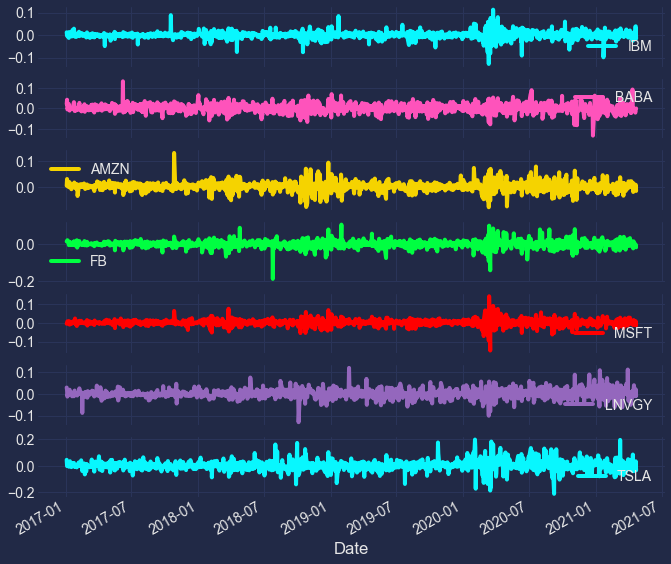

In [36]:
df= data.pct_change().dropna()
df.plot(subplots=True,legend=True,figsize=(10,10))
plt.show()

# Calculamos el VaR de cada una de ellas 

In [37]:
import atita_tools as at
import daffy_tools as daf 

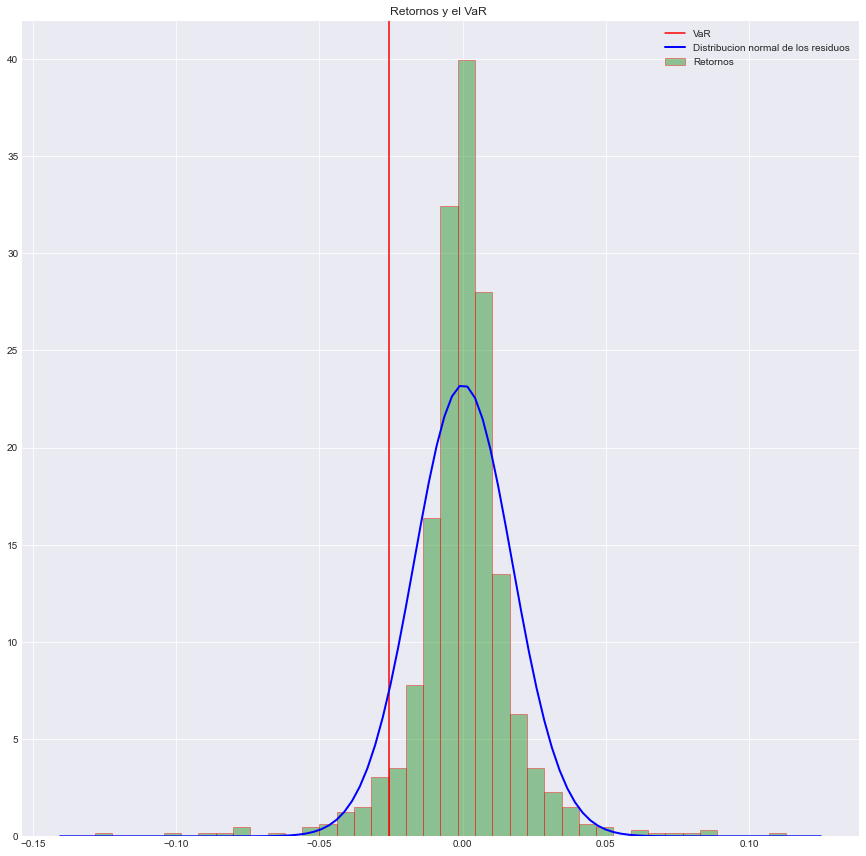

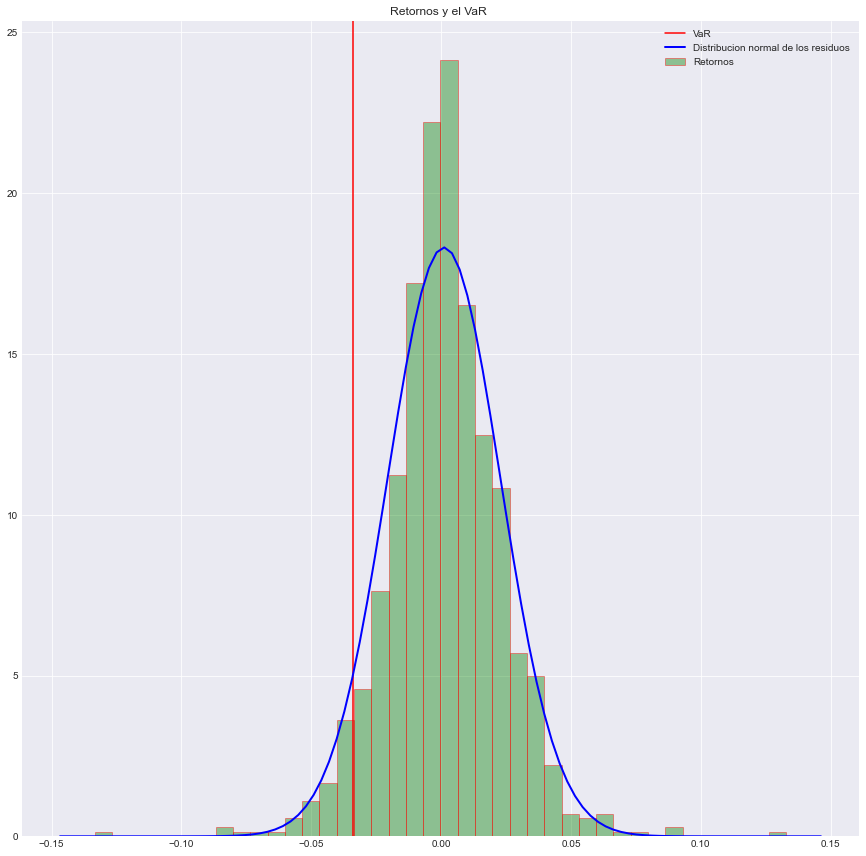

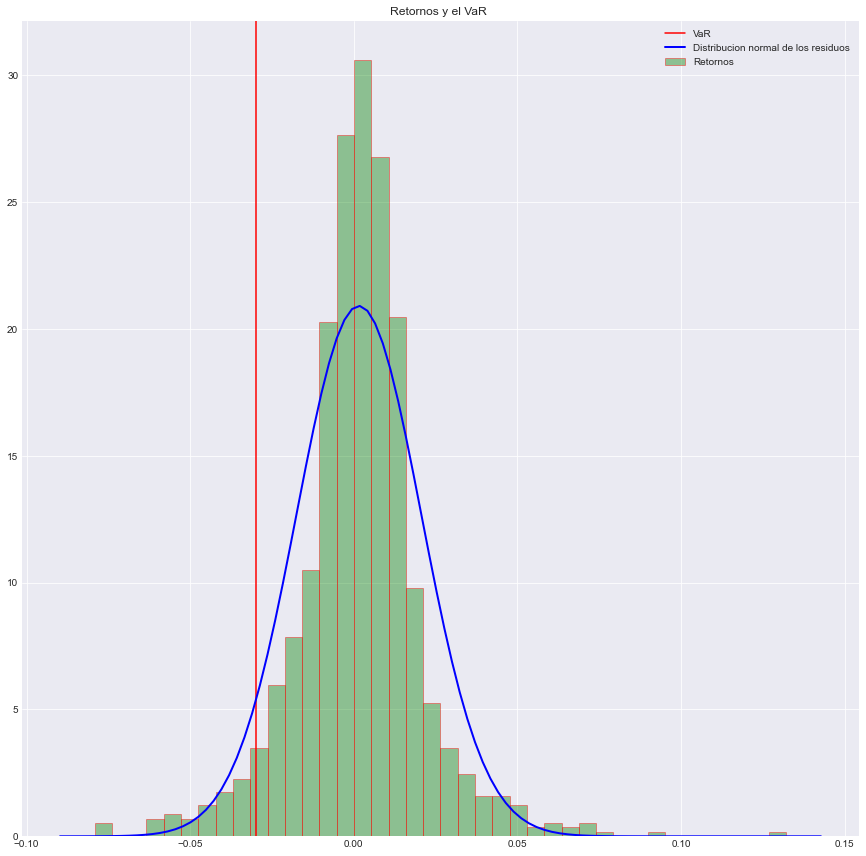

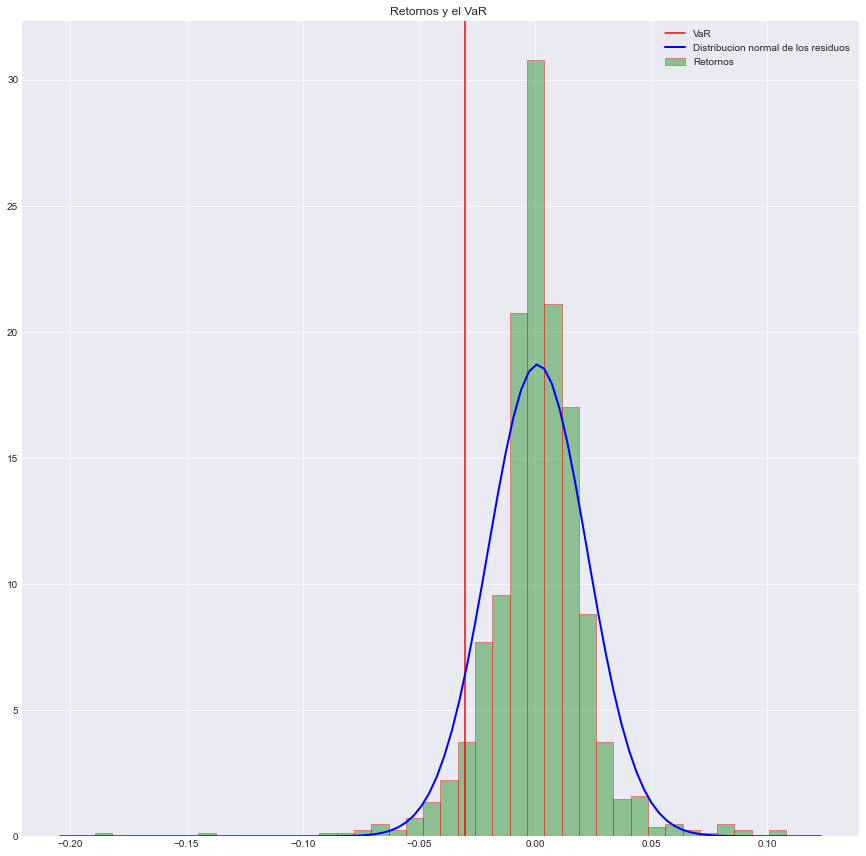

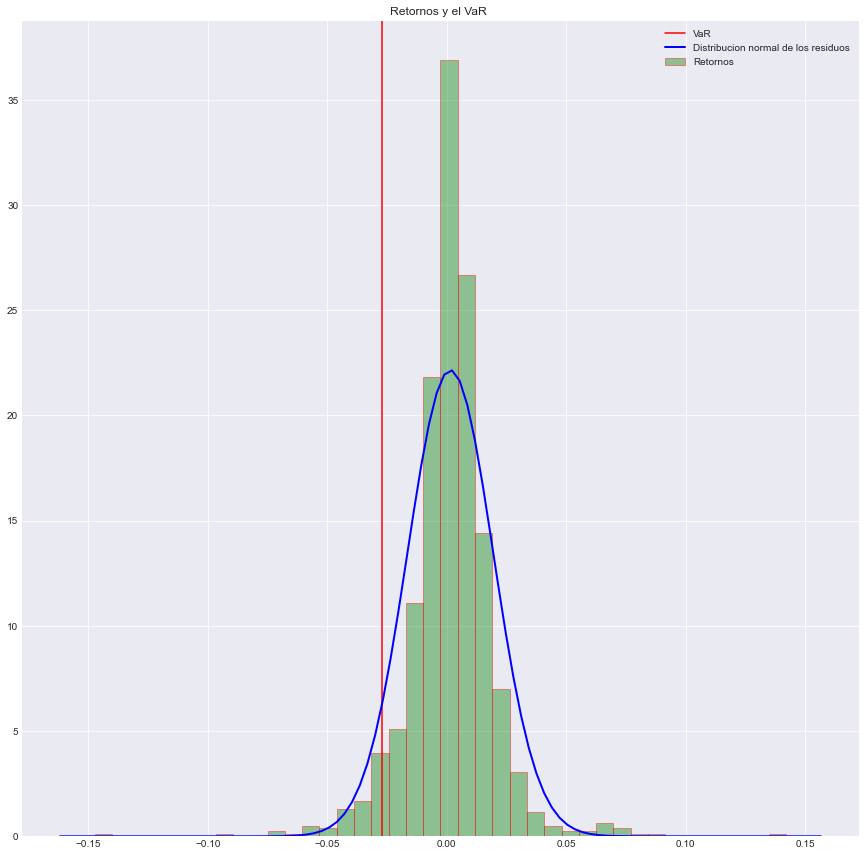

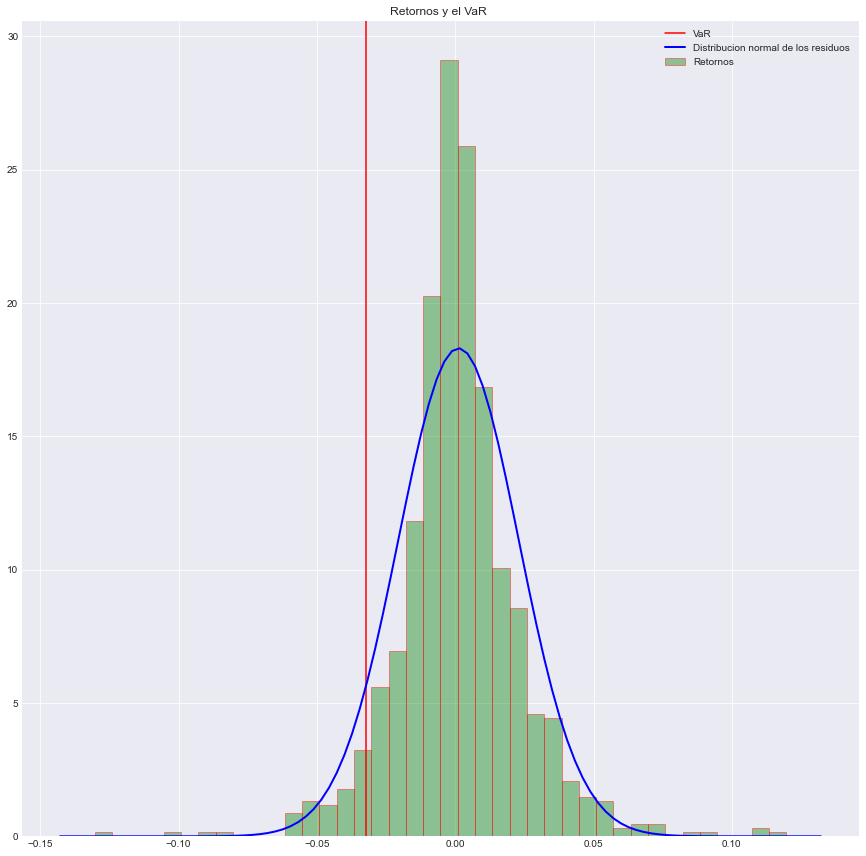

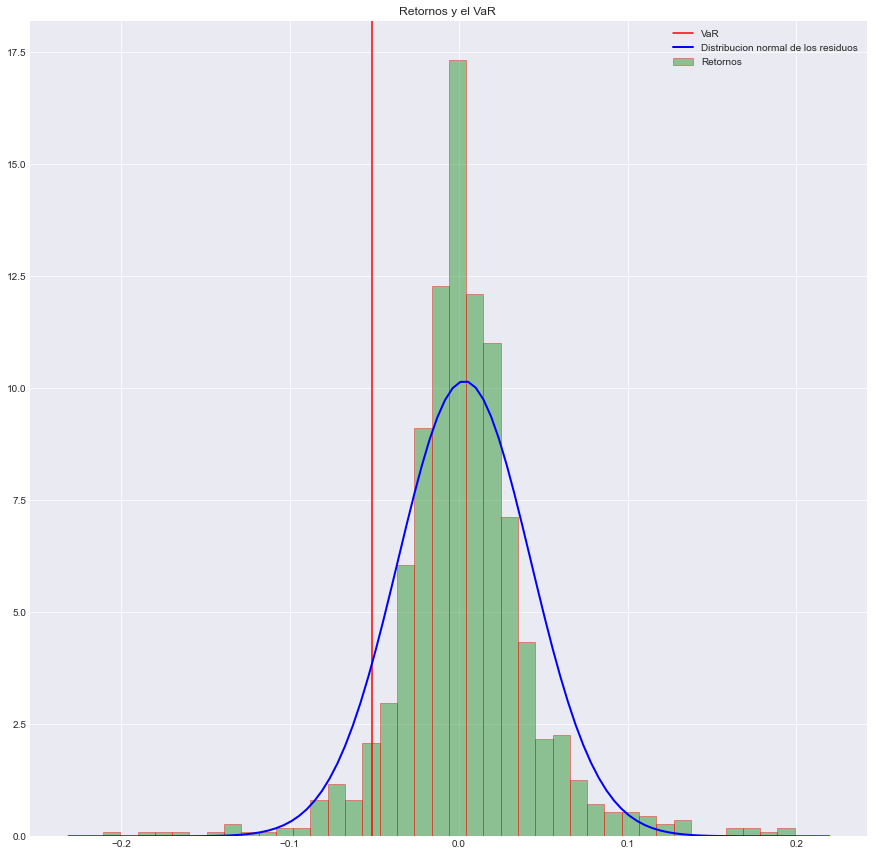

In [6]:
for i  in acciones:
    daf.graphics(data[i].pct_change().dropna())

IBM
BABA
AMZN
FB
MSFT
LNVGY
TSLA


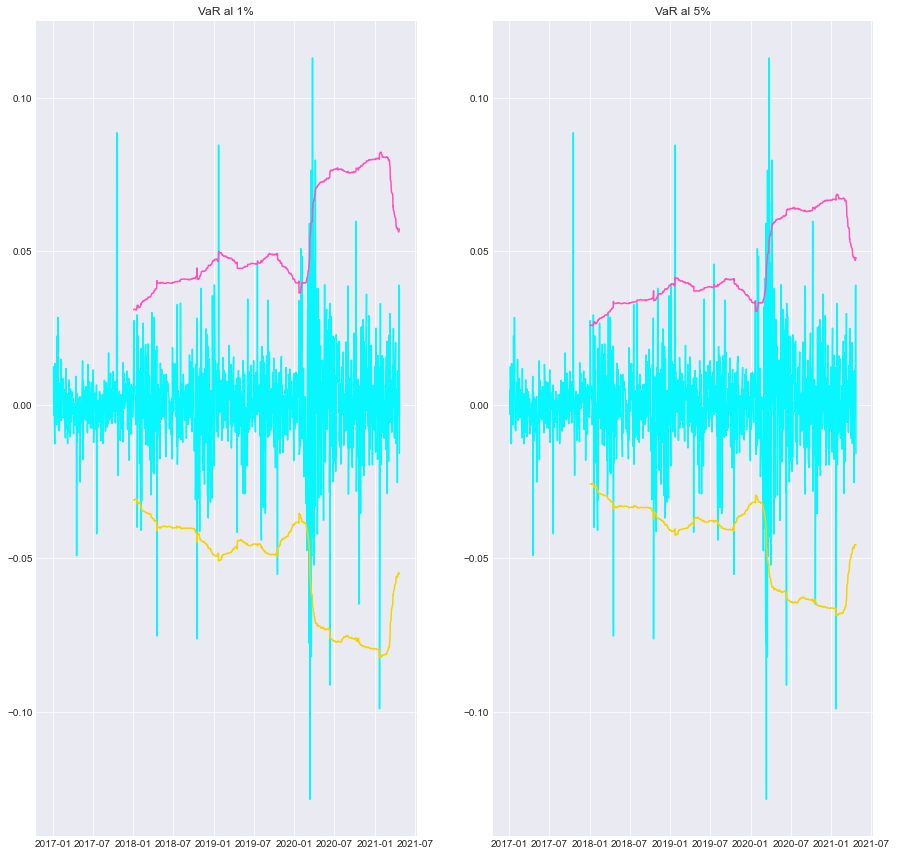

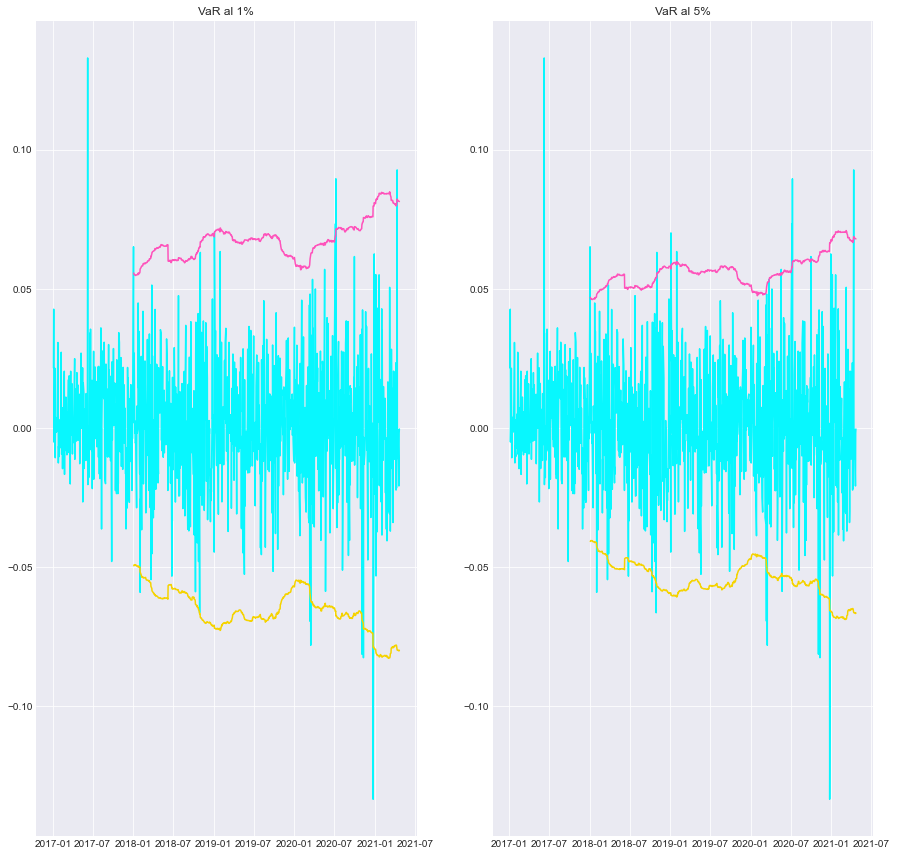

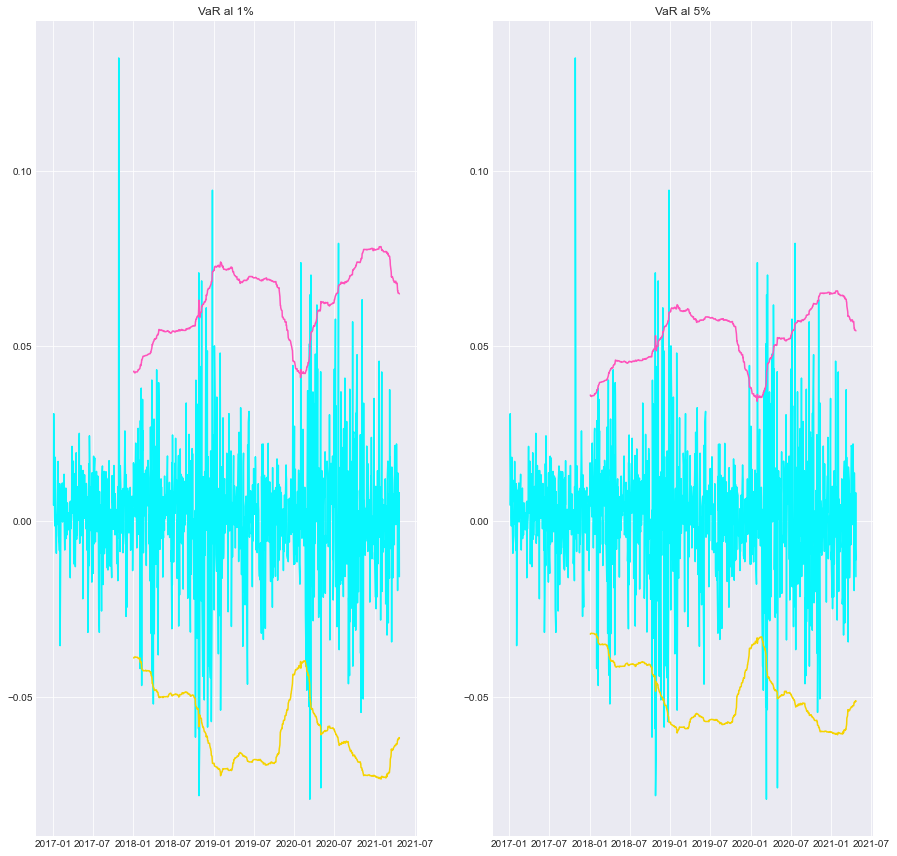

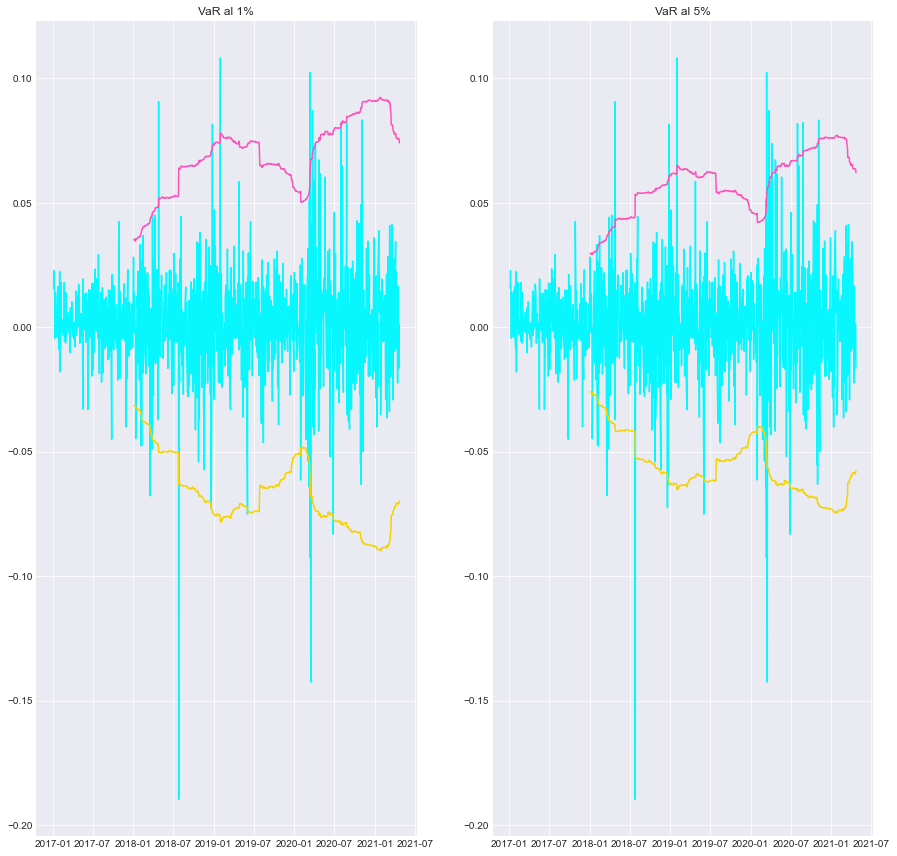

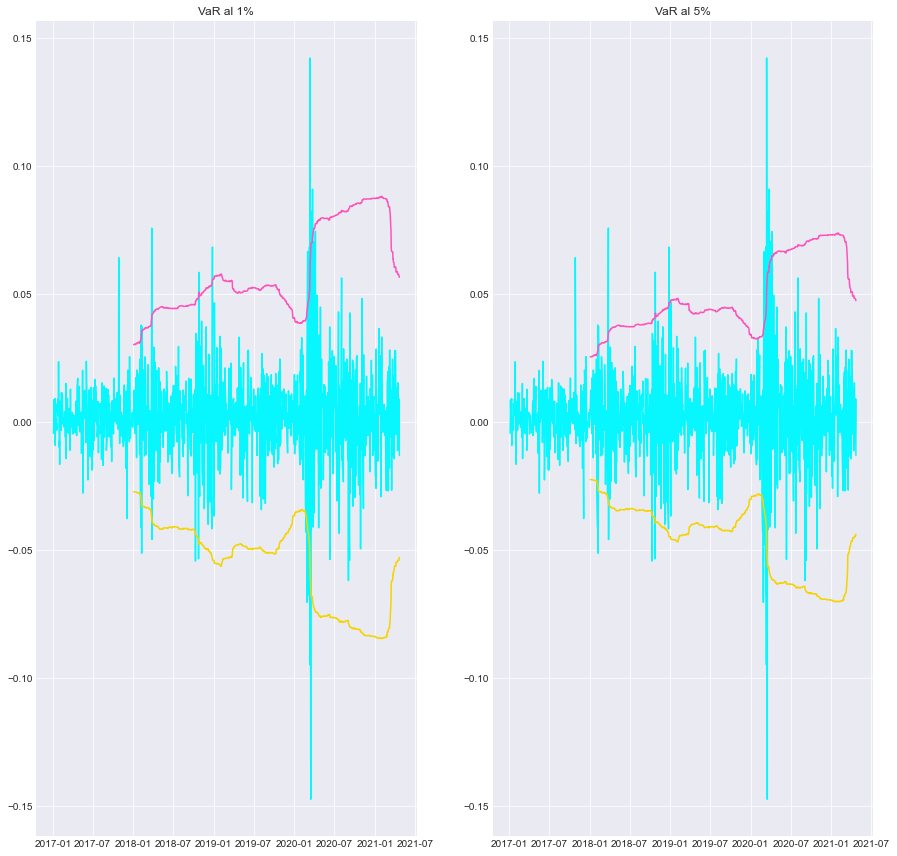

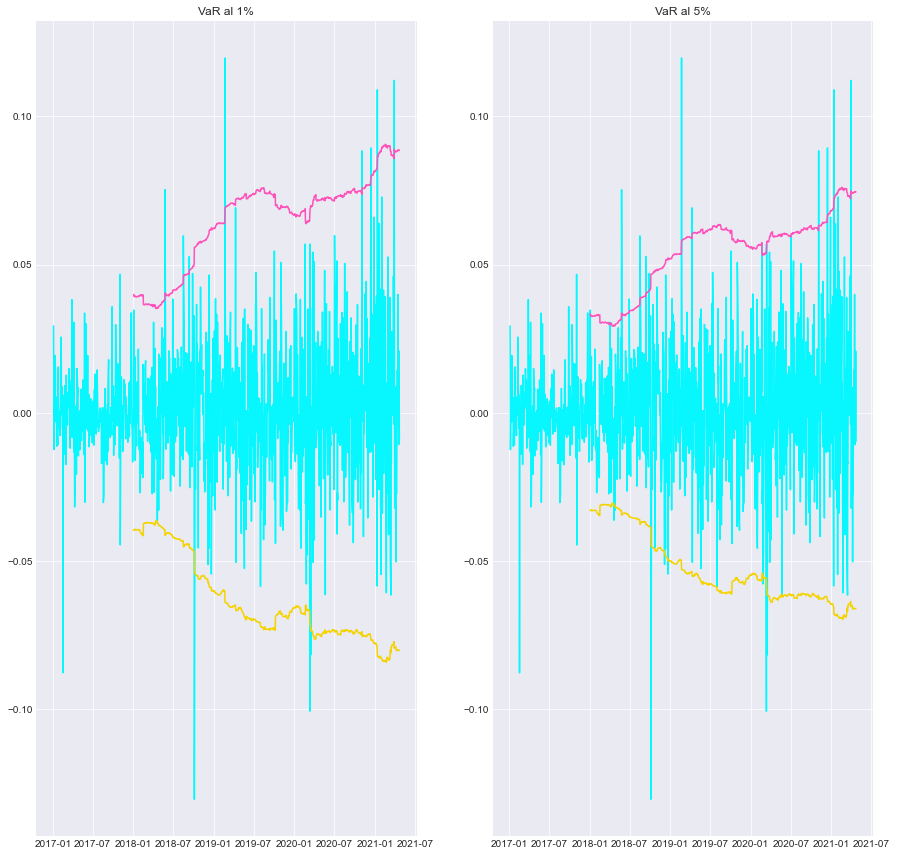

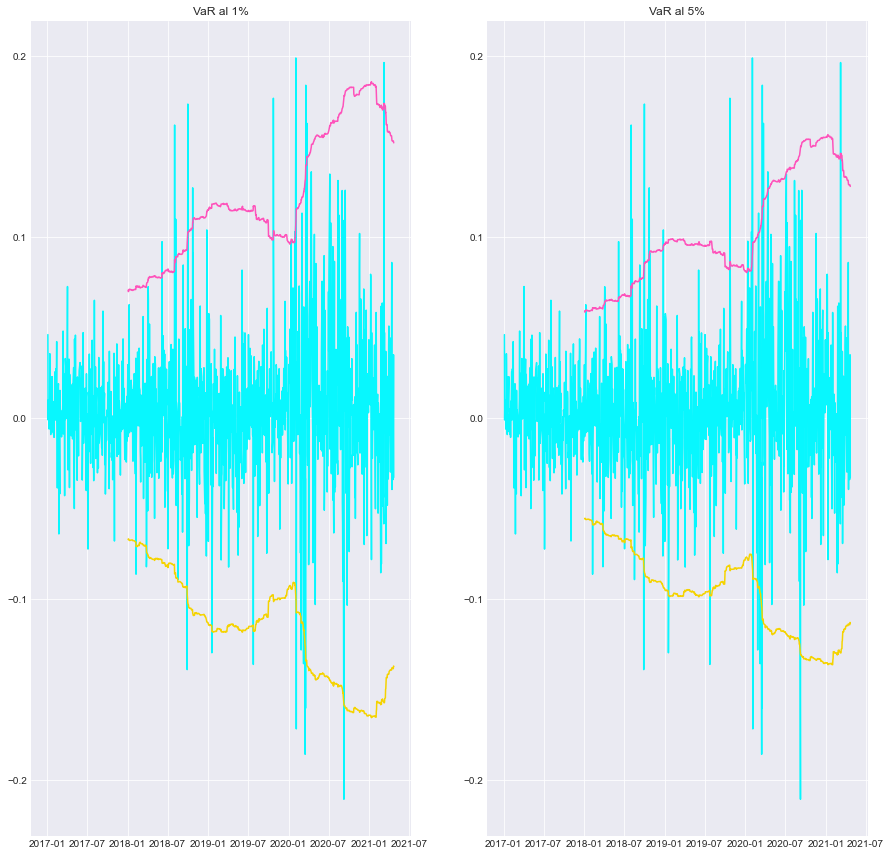

In [7]:
for i in acciones:
    print(i)
    at.VaR(data[i].pct_change().dropna(),252)

# Definimos los pesos de los activos 

In [16]:
weights=[]
len_acc=len(acciones)
# Equally weigthed
for i in range(len_acc):
    weights.append(1/len_acc)
w=np.array(weights)

# Calculamos las siguientes metricas

In [25]:
r = np.array(np.mean(df))
C = np.cov(df.transpose())

#Validamos
print("Rendimiento esperado:", r)
print("Pesos activos:", w)
print("Matriz VarCov:", C)

Rendimiento esperado: [0.00017157 0.00111647 0.00154946 0.00109087 0.00153093 0.00118433
 0.00336541]
Pesos activos: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
Matriz VarCov: [[2.95122107e-04 1.19743535e-04 1.18088833e-04 1.29543313e-04
  1.65267051e-04 8.89347643e-05 1.56451433e-04]
 [1.19743535e-04 4.74449533e-04 2.21058840e-04 2.23322862e-04
  2.07885535e-04 1.60610436e-04 2.67468941e-04]
 [1.18088833e-04 2.21058840e-04 3.64172627e-04 2.58748823e-04
  2.49052542e-04 9.57710114e-05 2.87429759e-04]
 [1.29543313e-04 2.23322862e-04 2.58748823e-04 4.54754250e-04
  2.49558404e-04 9.35325271e-05 2.80275775e-04]
 [1.65267051e-04 2.07885535e-04 2.49052542e-04 2.49558404e-04
  3.24246632e-04 1.12110055e-04 3.01476309e-04]
 [8.89347643e-05 1.60610436e-04 9.57710114e-05 9.35325271e-05
  1.12110055e-04 4.75133952e-04 1.67711173e-04]
 [1.56451433e-04 2.67468941e-04 2.87429759e-04 2.80275775e-04
  3.01476309e-04 1.67711173e-04 1.54213582e-03]]


# Definimos las siguientes funciones

In [26]:
def mu(w,r):
    '''Rendimiento portafolio anualizado'''
    return sum(w * r * 252) 


def sigma(w, C):
    '''Desv STD portadolio anualizada'''
    return np.dot(w,np.dot(C,w.T)) ** (1/2) * 252 ** (1/2)


def sharpe(w):
    '''Sharpe ratio con rf de 4%'''
    rf = .04
    return (mu(w,r) - rf) / sigma(w,C)


def neg_sharpe(w):
    '''Sharpe ratio negativo'''
    return -sharpe(w)


def random_ports(n):
    '''Portafolio aleatorios'''
    means, stds = [],[]
    for i in range(n):
        rand_w = np.random.rand(len(acciones))
        rand_w = rand_w / sum(rand_w)
        means.append(mu(rand_w, r))
        stds.append(sigma(rand_w,C))
    
    return means, stds

 # los pesos ideales de cada activo del portafolio

In [29]:
import scipy.optimize as optimize

def apply_sum_constraint(inputs):
    total = 1 - np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })


result = optimize.minimize(neg_sharpe, 
                      w, 
                      method='SLSQP', 
                      bounds=((0, 1.0), (0, 1.0), (0, 1.0),(0,1.0),(0,1.0),(0,1.0),(0,1.0)),
                      options={'disp': True},
                      constraints=my_constraints)
print(result)
optimal_w = result["x"]

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.5543563619551202
            Iterations: 8
            Function evaluations: 66
            Gradient evaluations: 8
     fun: -1.5543563619551202
     jac: array([ 0.47704585,  0.04076377, -0.13717763,  0.11862724, -0.13712031,
       -0.13812707, -0.13683145])
 message: 'Optimization terminated successfully'
    nfev: 66
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([2.45955900e-16, 0.00000000e+00, 2.68706389e-01, 0.00000000e+00,
       2.74083436e-01, 1.91800722e-01, 2.65409453e-01])


# Simulamos la forntera eficente

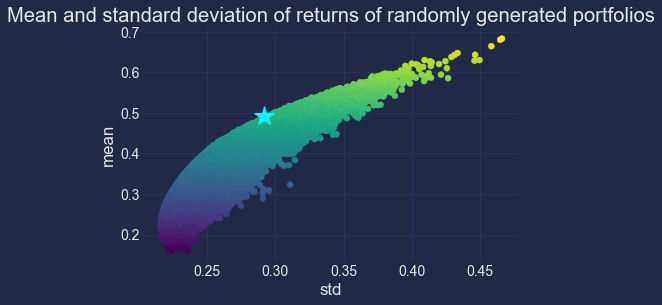

In [35]:
#Grafiquemos
n_portfolios = 500000
means, stds = random_ports(n_portfolios)
best_mu = mu(optimal_w, r)
best_sigma = sigma(optimal_w, C)
best_sharpe = sharpe(optimal_w)
plt.scatter(stds, means,c=means, cmap='viridis')
plt.plot(best_sigma, best_mu, '*',  markersize=20)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
plt.show()

# Encontamos el portafolio ideal

In [31]:
ata=pd.DataFrame(result.x)

In [32]:
ata.index=data.columns
ata.columns=["Eficiente"]
round(ata,2)

,Eficiente
IBM,0.00
BABA,0.00
AMZN,0.27
FB,0.00
MSFT,0.27
LNVGY,0.19
TSLA,0.27


# Portafolio con 7 activos

In [32]:
acciones= ["FB","IBM","AMZN","TSLA","MSFT","KO","JPY=X"]
data=pd.DataFrame()
for i in acciones:
  data[i]=web.get_data_yahoo(i,"2017-1-1")["Adj Close"]

In [33]:
data=data.dropna()

In [34]:
weights=[]
len_acc=len(acciones)
# Equally weigthed
for i in range(len_acc):
    weights.append(1/len_acc)
w=np.array(weights)

In [35]:
df=data.pct_change().dropna()

In [36]:
r = np.array(np.mean(df))
C = np.cov(df.transpose())

#Validamos
print("Rendimiento esperado:", r)
print("Pesos activos:", w)
print("Matriz VarCov:", C)

Rendimiento esperado: [ 1.38659115e-03  5.43194364e-06  2.05879785e-03  3.53905235e-03
  1.79932865e-03  4.74194899e-04 -1.12482294e-04]
Pesos activos: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
Matriz VarCov: [[ 5.16225117e-04  1.72846438e-04  2.94643125e-04  3.12714898e-04
   2.92872435e-04  9.29116042e-05  6.35069240e-06]
 [ 1.72846438e-04  3.27834606e-04  1.64347540e-04  2.05521926e-04
   2.12473528e-04  1.42678177e-04  5.08375405e-06]
 [ 2.94643125e-04  1.64347540e-04  4.27206246e-04  3.11158482e-04
   2.85590574e-04  7.09483709e-05  7.17100594e-06]
 [ 3.12714898e-04  2.05521926e-04  3.11158482e-04  1.57155474e-03
   3.36744369e-04  1.37748651e-04  4.58690202e-07]
 [ 2.92872435e-04  2.12473528e-04  2.85590574e-04  3.36744369e-04
   3.77658052e-04  1.30704354e-04  5.42903669e-06]
 [ 9.29116042e-05  1.42678177e-04  7.09483709e-05  1.37748651e-04
   1.30704354e-04  1.96074359e-04 -5.71151427e-06]
 [ 6.35069240e-06  5.08375405e-06  7.17100594e-06  

In [37]:
import scipy.optimize as optimize

def apply_sum_constraint(inputs):
    total = 1 - np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })


result = optimize.minimize(neg_sharpe, 
                      w, 
                      method='SLSQP', 
                      bounds=((0, 1.0), (0, 1.0), (0, 1.0),(0,1.0),(0,1.0),(0,1.0),(0,1.0)),
                      options={'disp': True},
                      constraints=my_constraints)
print(result)
optimal_w = result["x"]

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.7096346078027542
            Iterations: 8
            Function evaluations: 66
            Gradient evaluations: 8
     fun: -1.7096346078027542
     jac: array([ 0.1208452 ,  0.72331709, -0.12013043, -0.12230277, -0.12090008,
        0.03507714,  0.10542198])
 message: 'Optimization terminated successfully'
    nfev: 66
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([2.47079377e-16, 0.00000000e+00, 5.32711759e-01, 2.68262121e-01,
       1.99026120e-01, 7.28887107e-17, 1.14727379e-16])


Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

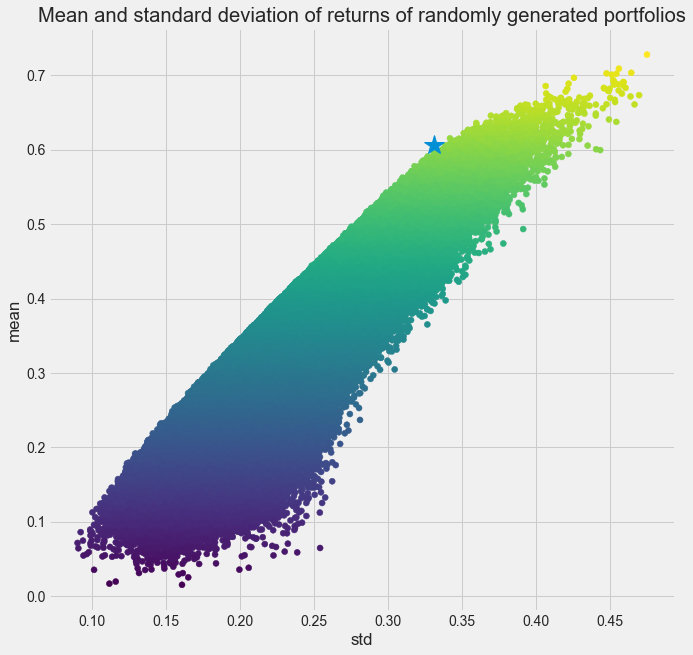

In [38]:
#Grafiquemos
n_portfolios = 5000000
means, stds = random_ports(n_portfolios)

best_mu = mu(optimal_w, r)
best_sigma = sigma(optimal_w, C)
best_sharpe = sharpe(optimal_w)
plt.figure(figsize=(10,10))
plt.scatter(stds, means,c=means, cmap='viridis')
plt.plot(best_sigma, best_mu, '*',  markersize=20)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

In [39]:
ata=pd.DataFrame(result.x)

In [40]:
ata.index=data.columns
ata.columns=["Eficiente"]
round(ata,2)

,Eficiente
FB,0.00
IBM,0.00
AMZN,0.53
TSLA,0.27
MSFT,0.20
KO,0.00
JPY=X,0.00
